In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm, skew
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',100)

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
data=pd.read_csv('airfoil_self_noise.csv',sep='\t',
                 names=['Freq','Angle','Chord','Velo','Thickness','Pressure'])

In [4]:
data.head()

,Freq,Angle,Chord,Velo,Thickness,Pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [4]:
data['Pressure2']=data['Pressure']**2
data['Pressure_r']=1/data['Pressure']
data['Pressure_log']=np.log(data['Pressure'])

In [5]:
data['Angle_sin']=np.sin(data['Angle']/180*np.pi)
data['Angle_cos']=np.cos(data['Angle']/180*np.pi)

In [6]:
data['Angle_sin2']=data['Angle_sin']**2
data['Angle_cos2']=data['Angle_cos']**2

In [7]:
data['Angle_sin_r']=1/data['Angle_sin']
data['Angle_cos_r']=1/data['Angle_cos']

In [56]:
data['velo_freq_thick']=data['Velo']/(data['Freq']*data['Thickness'])
data['velo_freq_chord']=data['Velo']/(data['Freq']*data['Chord'])
data['chord_thick']=data['Chord']/data['Thickness']

In [9]:
data['Freq_log']=np.log(data['Freq'])
data['Angle_log']=np.log(data['Angle']+1)
data['Chord_log']=np.log(data['Chord'])
data['Velo_log']=np.log(data['Velo'])
data['Thickness_log']=np.log(data['Thickness'])

In [10]:
# squared root
data['Freq_sqrt']=np.sqrt(data['Freq'])
data['Angle_sqrt']=np.sqrt(data['Angle']+1)
data['Chord_sqrt']=np.sqrt(data['Chord'])
data['Velo_sqrt']=np.sqrt(data['Velo'])
data['Thickness_sqrt']=np.sqrt(data['Thickness'])

In [11]:
# Squared
data['Freq2']=data['Freq']**2
data['Angle2']=data['Angle']**2
data['Chord2']=data['Chord']**2
data['Velo2']=data['Velo']**2
data['Thickness2']=data['Thickness']**2

In [12]:
# Cubed
data['Freq3']=data['Freq']**3
data['Angle3']=data['Angle']**3
data['Chord3']=data['Chord']**3
data['Velo3']=data['Velo']**3
data['Thickness3']=data['Thickness']**3

In [13]:
# Reciprocal
data['Freq_r']=1/data['Freq']
data['Angle_r']=1/(data['Angle']+1)
data['Chord_r']=1/data['Chord']
data['Velo_r']=1/data['Velo']
data['Thickness_r']=1/data['Thickness']

In [14]:
data.head(3)

,Freq,Angle,Chord,Velo,Thickness,Pressure,Pressure2,Pressure_r,Pressure_log,Angle_sin,Angle_cos,Angle_sin2,Angle_cos2,Angle_sin_r,Angle_cos_r,velo_freq_thick,velo_freq_chord,Freq_log,Angle_log,Chord_log,Velo_log,Thickness_log,Freq_sqrt,Angle_sqrt,Chord_sqrt,Velo_sqrt,Thickness_sqrt,Freq2,Angle2,Chord2,Velo2,Thickness2,Freq3,Angle3,Chord3,Velo3,Thickness3,Freq_r,Angle_r,Chord_r,Velo_r,Thickness_r
0,800,0.0,0.3048,71.3,0.002663,126.201,15926.692401,0.007924,4.837876,0.0,1.0,0.0,1.0,inf,1.0,33.463244,0.292405,6.684612,0.0,-1.188099,4.266896,-5.928163,28.284271,1.0,0.552087,8.443933,0.051608,640000,0.0,0.092903,5083.69,0.000007,512000000,0.0,0.028317,362467.097,1.889272e-08,0.00125,1.0,3.28084,0.014025,375.464168
1,1000,0.0,0.3048,71.3,0.002663,125.201,15675.290401,0.007987,4.829920,0.0,1.0,0.0,1.0,inf,1.0,26.770595,0.233924,6.907755,0.0,-1.188099,4.266896,-5.928163,31.622777,1.0,0.552087,8.443933,0.051608,1000000,0.0,0.092903,5083.69,0.000007,1000000000,0.0,0.028317,362467.097,1.889272e-08,0.00100,1.0,3.28084,0.014025,375.464168
2,1250,0.0,0.3048,71.3,0.002663,125.951,15863.654401,0.007940,4.835893,0.0,1.0,0.0,1.0,inf,1.0,21.416476,0.187139,7.130899,0.0,-1.188099,4.266896,-5.928163,35.355339,1.0,0.552087,8.443933,0.051608,1562500,0.0,0.092903,5083.69,0.000007,1953125000,0.0,0.028317,362467.097,1.889272e-08,0.00080,1.0,3.28084,0.014025,375.464168


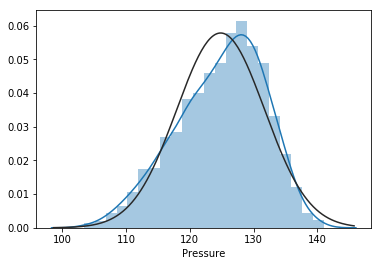

In [15]:
sns.distplot(data['Pressure'],fit=norm)
plt.show()

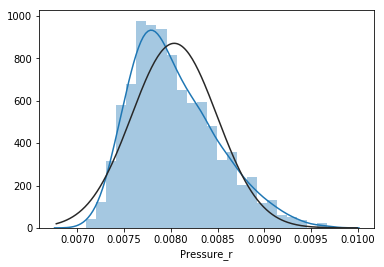

In [16]:
sns.distplot(data['Pressure_r'],fit=norm)
plt.show()

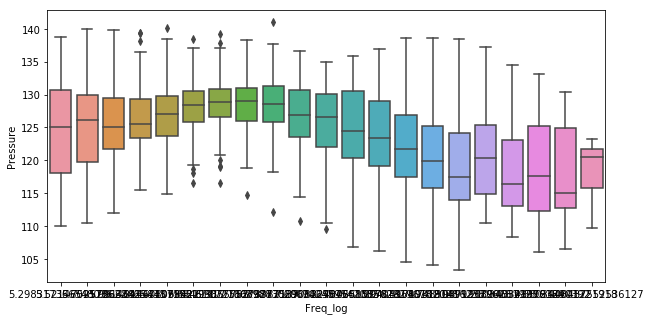

In [93]:
plt.figure(figsize=(10,5))
sns.boxplot(data['Freq_log'],data['Pressure'])
# plt.scatter(x=data['Freq_log'],y=data['Pressure'])
plt.show()

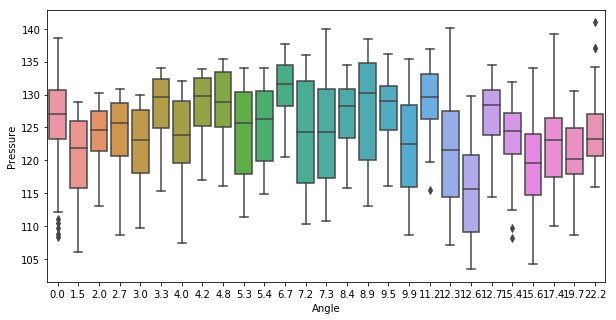

In [92]:
plt.figure(figsize=(10,5))
sns.boxplot(data['Angle'],data['Pressure'])
# plt.scatter(x=data['Angle'],y=data['Pressure'])
plt.show()

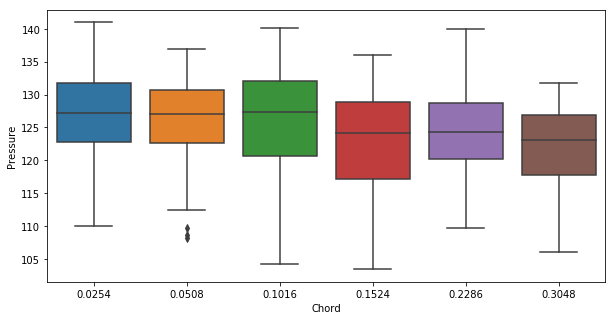

In [89]:
plt.figure(figsize=(10,5))
sns.boxplot(data['Chord'],data['Pressure'])
# plt.scatter(x=data['Chord'],y=data['Pressure'])
plt.show()

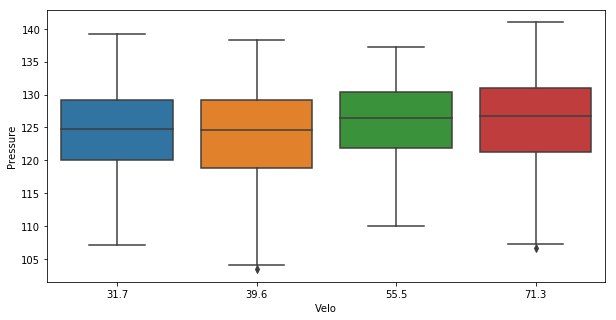

In [88]:
plt.figure(figsize=(10,5))
# b1=plt.boxplot(x=data['Pressure'][data['Velo']==71.3],positions=[1])
# b2=plt.boxplot(x=data['Pressure'][data['Velo']==55.5],positions=[2])
sns.boxplot(data['Velo'],data['Pressure'])
plt.show()

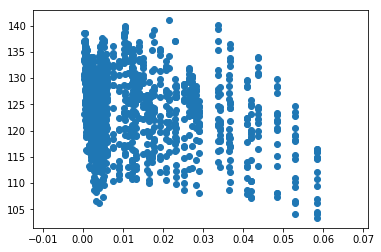

In [28]:
plt.scatter(x=data['Thickness'],y=data['Pressure'])
plt.show()

In [52]:
# This used the original data & combination
result = smf.ols(formula=\
                 "Pressure_r~Chord+Velo+Thickness2+Freq2+Freq_r+Thickness_r+Freq_sqrt+Angle_cos2+velo_freq_thick+velo_freq_chord"\
                 , data=data).fit()
print(result.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.790      
Dependent Variable: Pressure_r       AIC:                -21178.5495
Date:               2019-02-15 15:28 BIC:                -21120.0821
No. Observations:   1503             Log-Likelihood:     10600.     
Df Model:           10               F-statistic:        564.4      
Df Residuals:       1492             Prob (F-statistic): 0.00       
R-squared:          0.791            Scale:              4.4135e-08 
--------------------------------------------------------------------
                     Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------
Intercept            0.0088   0.0003  30.6926 0.0000  0.0082  0.0093
Chord                0.0021   0.0001  24.1390 0.0000  0.0019  0.0022
Velo                -0.0000   0.0000 -30.0166 0.0000 -0.0000 -0.0000
Thickness2           0.3452   0.0111  30.9654 0.0000 

In [57]:
# Min max standardize the data
data_std=data.copy()
for col in data_std.columns:
    ma=data_std[col].max()
    mi=data_std[col].min()
    data_std[col]=(data_std[col]-mi)/(ma-mi)

In [94]:
# This used data after standardization, no change in R^2
result = smf.ols(formula=\
                 "Pressure~Chord+Velo+Thickness2+Freq_log+Thickness_r+Angle_sin+velo_freq_thick+velo_freq_chord"\
                 , data=data_std).fit()
print(result.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.761     
Dependent Variable: Pressure         AIC:                -2976.6934
Date:               2019-02-15 17:38 BIC:                -2928.8564
No. Observations:   1503             Log-Likelihood:     1497.3    
Df Model:           8                F-statistic:        599.9     
Df Residuals:       1494             Prob (F-statistic): 0.00      
R-squared:          0.763            Scale:              0.0080318 
-------------------------------------------------------------------
                    Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept           1.2201   0.0161  75.5984 0.0000  1.1884  1.2517
Chord              -0.3110   0.0121 -25.6893 0.0000 -0.3348 -0.2873
Velo                0.1897   0.0065  29.3735 0.0000  0.1771  0.2024
Thickness2         -0.4286   0.0166 -25.8459 0.0000 -0.4612 -0.396